# Imports

In [1091]:
##Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sb
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import metrics as m

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from collections import Counter
#from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule

%matplotlib inline

# Constants

In [1092]:
##Variables
dsred = pd.read_csv("winequality-red.csv",';')
dswhite = pd.read_csv("winequality-white.csv", ';')

combinedds = [dsred,dswhite]
dsMath = pd.concat(combinedds)

print(dsred.shape)
print(dswhite.shape)

(1599, 12)
(4898, 12)


# Math Inspect

In [1093]:
print(dsMath.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

# Math Data Processing

In [1094]:
print(dsMath.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [1095]:
print(dsMath.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [1096]:
dsMath = dsMath.dropna() 
print (dsMath.count())
print (dsMath.shape)

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
dtype: int64
(6497, 12)


In [1097]:
duplicate_rows_df = dsMath[dsMath.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1179, 12)


In [1098]:
# Dropping the duplicates 
#dsMath = dsMath.drop_duplicates()

# Counting the number of rows after removing duplicates.
dsMath.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
dtype: int64

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

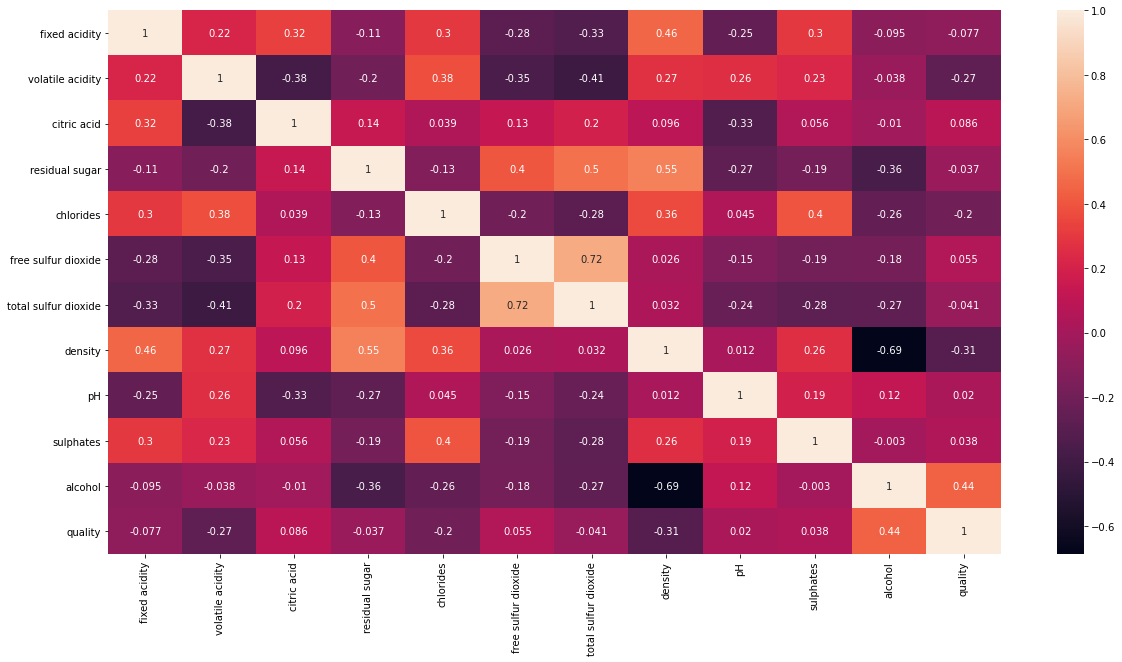

In [1099]:
plt.figure(figsize=(20,10))
corl= dsMath.corr()
sb.heatmap(corl,annot=True)
print (corl)

In [1100]:
y = dsMath.quality.values
x = dsMath.drop(['quality'], axis=1)

#oss = OneSidedSelection(random_state = 42)
#x,y = oss.fit_resample(x,y)

ncr = NeighbourhoodCleaningRule()
x, y = ncr.fit_resample(x, y)

Counter(y)
Counter(x)

Counter({'fixed acidity': 1,
         'volatile acidity': 1,
         'citric acid': 1,
         'residual sugar': 1,
         'chlorides': 1,
         'free sulfur dioxide': 1,
         'total sulfur dioxide': 1,
         'density': 1,
         'pH': 1,
         'sulphates': 1,
         'alcohol': 1})

# Math Train

In [1101]:
# Split dataset into training set and test set:  70% training and 30% testing
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.30, random_state=0) 

print (x_train.shape)

(2306, 11)


In [1102]:
# Create Decision Tree classifer object
clf = dtc(max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [1103]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",m.accuracy_score(y_test, y_pred))

Accuracy: 0.7249747219413549


In [1104]:
feature_cols = ['citric acid','free sulfur dioxide','pH','sulphates','density','total sulfur dioxide','chlorides','fixed acidity','volatile acidity','alcohol','quality']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1','2','3','4','5','6','7','8','9','10'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.909184 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.909184 to fit

